In [1]:
import sys
sys.path.insert(0, '..')
import qsee.ansatz as ansatz
%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


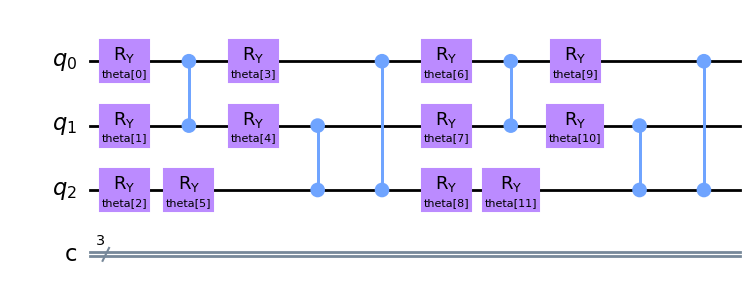

In [25]:
ansatz.g2(3, 2).draw('mpl')

In [4]:
def f(num_qubits, num_layers, anszat, vdagger_input):
    optimizer = 'adam'

    if anszat == 'g2':
        u_input = qsee.ansatz.g2(num_qubits, num_layers) 
        ansatz_input = qsee.ansatz.g2
    if anszat == 'g2gn':
        u_input = qsee.ansatz.g2gn(num_qubits, num_layers) 
        ansatz_input = qsee.ansatz.g2gn
    if anszat == 'g2gnw':
        u_input = qsee.ansatz.g2gnw(num_qubits, num_layers) 
        ansatz_input = qsee.ansatz.g2gnw
        
    if vdagger_input == 'ghz':
            vdagger = qsee.state.ghz(num_qubits).inverse()
    if vdagger_input == 'w':
            vdagger = qsee.state.w(num_qubits).inverse()
    if vdagger_input == 'ame':
            vdagger = qsee.state.ame(num_qubits).inverse()   
    if vdagger_input == 'haar':
            vdagger = qsee.state.haar(num_qubits).inverse() 
    compiler = qsee.qcompilation.QuantumCompilation(
        u = u_input,
        vdagger = vdagger,
        optimizer = optimizer,
        loss_func = 'loss_fubini_study'
    )
    compiler.fit(num_steps = 10, verbose = 1)
    qspobj = qsee.qsp.QuantumStatePreparation(
        compiler.u, 
        compiler.vdagger,
        compiler.thetas,
        ansatz = ansatz_input)
    qspobj.save(state = vdagger_input, file_name='./')

    return

In [5]:
import qsee.state
import qiskit
import numpy as np
psi = qsee.state.haar(num_qubits = 3)
print(np.real(qi.Statevector(psi)))
print(psi)

[ 0.30297088  0.64007397 -0.42033743  0.03875275 -0.51120341  0.04402547
  0.11541105  0.20914527]
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
c: 3/»
     »
«     ┌────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                       ├
«     │                                                                                        │
«q_1: ┤1 State Preparation(0.30297,0.64007,-0.42034,0.038753,-0.5112,0.044025,0.11541,0.20915) ├
«     │                                                                                        │
«q_2: ┤2                                                                                       ├
«     └────────────────────────────────────────────────────────────────────────────────────────┘
«c: 3/══════════════════════════════════════════════════════════════════════════════════════════
«                                                             

In [27]:
database_path = '../experiments/qsp/'
state = 'haar'
num_qubits = 5
best_ansatz = qsp.QuantumStatePreparation.find_satisfying_qspobj(
    state, num_qubits, 
    error_rate = 0.07, 
    database_path = database_path)
best_ansatz.u.draw('mpl')

['haar_g2_5_2.qspobj', 'haar_g2gn_5_8.qspobj', 'haar_g2gn_5_4.qspobj', 'haar_g2gnw_5_6.qspobj', 'haar_g2gnw_5_10.qspobj', 'haar_g2gnw_5_8.qspobj', 'haar_g2gnw_5_4.qspobj', 'haar_g2gn_5_6.qspobj', 'haar_g2gn_5_2.qspobj', 'haar_g2_5_4.qspobj', 'haar_g2_5_8.qspobj', 'haar_g2_5_6.qspobj', 'haar_g2_5_10.qspobj', 'haar_g2gnw_5_2.qspobj', 'haar_g2gnw_5_7.qspobj', 'haar_g2gn_5_9.qspobj', 'haar_g2gn_5_5.qspobj', 'haar_g2_5_3.qspobj', 'haar_g2gn_5_7.qspobj', 'haar_g2_5_1.qspobj', 'haar_g2gnw_5_9.qspobj', 'haar_g2gnw_5_5.qspobj', 'haar_g2_5_5.qspobj', 'haar_g2_5_9.qspobj', 'haar_g2gn_5_3.qspobj', 'haar_g2gn_5_10.qspobj', 'haar_g2gnw_5_1.qspobj', 'haar_g2gnw_5_3.qspobj', 'haar_g2_5_7.qspobj', 'haar_g2gn_5_1.qspobj']


ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
import json, os

def convert_qspobj_to_json():
    path = '../experiments/qsp/'
    save_path = '../experiments/qspjson/'

    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    for file in files:
        compiler = qsee.qsp.QuantumStatePreparation(f"{path}{file}")
        qspobj = {
            'u': file.split('_')[1].lower(),
            'vdagger': file.split('_')[0].lower(),
            'num_qubits': compiler.num_qubits,
            'num_layers': compiler.num_layers,
            'thetas': list(compiler.thetas),
        }

        with open(f"{save_path}{file.split('.')[0].lower()}.json", "w") as file:
            json.dump(qspobj, file)
            
convert_qspobj_to_json()

In [2]:
import qsee.qsp as qsp
compiler = qsp.QuantumStatePreparation('../experiments/qsp/ghz_g2_9_2.qspobj')
compiler.vdagger.draw('mpl') 

ValueError: not enough values to unpack (expected 3, got 2)

In [49]:
import qsee.ansatz
import numpy as np
import qsee.qsp
import json
file = '../experiments/qspjson/haar_g2gn_3_2.json'
with open(file) as f:
    qspjson = json.load(f)
num_qubits = qspjson['num_qubits']
num_layers = qspjson['num_layers']
u = getattr(qsee.ansatz, qspjson['u'])(num_qubits, num_layers)
vdagger = getattr(qsee.state, qspjson['vdagger'])(num_qubits).inverse()
thetas = np.array(qspjson['thetas'])
ansatz = getattr(qsee.ansatz, qspjson['u'])
qspobj = qsee.qsp.QuantumStatePreparation(u, vdagger, thetas, ansatz)
print(qspobj.fidelity)

0.195315932882392
